In [40]:
import pandas as pd
import re

In [224]:
df = pd.read_csv('wine_cleared.csv', index_col='Unnamed: 0')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 12.9+ MB


In [225]:
display(df)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [226]:
df['price_round'] = df['price'].round().astype(int)

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

In [227]:
df['year'] = df['title'].str.findall('\d{4}').str.get(0)

In [228]:
display(df)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012


In [229]:
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [230]:
# Выберите из списка две самых популярных (помимо США) страны, производящих вино.
df['country'].value_counts(ascending=False, normalize=True).nlargest(10)

US           0.419558
France       0.170067
Italy        0.150414
Spain        0.051152
Portugal     0.043808
Chile        0.034424
Argentina    0.029251
Austria      0.025749
Australia    0.017928
Germany      0.016666
Name: country, dtype: float64

In [231]:
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [232]:
df['is_france'].sum()

22093

In [233]:
df['is_italy'].sum()

19540

In [234]:
df['year'] = df['year'].fillna(0)
df['year'] = df['year'].astype(int)

In [235]:
df['year'] = df['year'].astype(int)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
 12  price_round            129971 non-null  int32  
 13  year                   129971 non-null  int32  
 14  is_usa                 129971 non-nu

In [237]:
df['old_wine'] = df['year'].apply(lambda x: 1 if x - 2010 < 0 and x != 0  else 0)

In [238]:
df['old_wine'].sum()

39781

In [239]:
result = re.findall(r'[(](\w+\s*\w*)', 'Rainstorm 2013 Pinot Gris (Willamette Valley)')
print(result)

['Willamette Valley']


In [240]:
df['locality'] = df['title'].str.findall('[(](\w+\s*\w*)').str.get(0)

In [241]:
df['locality']

0                      Etna
1                     Douro
2         Willamette Valley
3             Lake Michigan
4         Willamette Valley
                ...        
129966         Erben Müller
129967               Oregon
129968               Alsace
129969               Alsace
129970               Alsace
Name: locality, Length: 129971, dtype: object

In [242]:
df_p = pd.read_csv('country_population.csv', sep=';')

In [243]:
df_p[df_p['country']=='Italy']

,country,population
24,Italy,"59,097,904"


In [244]:
df = df.join(df_p.set_index('country'), on = 'country')

In [245]:
df_a = pd.read_csv('country_area.csv', sep=';')

In [246]:
df_a

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [247]:
df = df.join(df_a.set_index('country'), on = 'country')

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129909 non-null  object 
 1   description            129972 non-null  object 
 2   designation            129972 non-null  object 
 3   points                 129972 non-null  int64  
 4   price                  129972 non-null  float64
 5   province               129909 non-null  object 
 6   region_1               129972 non-null  object 
 7   taster_name            129972 non-null  object 
 8   taster_twitter_handle  129972 non-null  object 
 9   title                  129972 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129972 non-null  object 
 12  price_round            129972 non-null  int32  
 13  year                   129972 non-null  int32  
 14  is_usa                 129972 non-nu

In [249]:
df[df['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,Gård 2014 Grand Klasse Reserve Lawrence Vineya...,...,Gård,22,2014,1,0,0,0,Columbia Valley,"333,022,386",9372610.0


4. Кодирование признаков. Дата и время

In [124]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [126]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds

In [127]:
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [128]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds

In [129]:
calls

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


In [130]:
calls['time_connection'].sum()

89

In [134]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x - 10 > 0 and x != 0 else 0)

In [135]:
calls['is_connection'].sum()

7

In [136]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds

In [138]:
calls['time_diff'].sum()

1144

In [139]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [140]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


In [149]:
df['year'] = pd.to_datetime(df['year'], errors = 'coerce', format='%Y')

In [150]:
df

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,area,population
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,1970-01-01 00:00:00.000002013,0,0,1,0,Etna,301230.0,"59,097,904"
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,1970-01-01 00:00:00.000002011,0,0,0,0,Douro,92391.0,"10,347,892"
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,Rainstorm,14,1970-01-01 00:00:00.000002013,1,0,0,0,Willamette Valley,9372610.0,"333,022,386"
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,St. Julian,13,1970-01-01 00:00:00.000002013,1,0,0,0,Lake Michigan,9372610.0,"333,022,386"
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,Sweet Cheeks,65,1970-01-01 00:00:00.000002012,1,0,0,0,Willamette Valley,9372610.0,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,1970-01-01 00:00:00.000002013,0,0,0,0,Erben Müller,357022.0,"83,129,285"
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,Citation,75,1970-01-01 00:00:00.000002004,1,0,0,1,Oregon,9372610.0,"333,022,386"
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,Domaine Gresser,30,1970-01-01 00:00:00.000002013,0,1,0,0,Alsace,547030.0,"68,035,000"
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,Domaine Marcel Deiss,32,1970-01-01 00:00:00.000002012,0,1,0,0,Alsace,547030.0,"68,035,000"


In [151]:
df['year_1'] = df['title'].str.findall('\d{4}').str.get(0)

In [152]:
df['year_1'] = df['year_1'].fillna(0)
df['year_1'] = df['year_1'].astype(int)

In [153]:
df['year_2'] = pd.to_datetime(df['year_1'], errors = 'coerce', format='%Y')

In [161]:
df = df.rename(columns={'year_2': 'year'})

In [162]:
df

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,is_usa,is_france,is_italy,old_wine,locality,area,population,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,0,0,1,0,Etna,301230.0,"59,097,904",2013-01-01
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,0,0,0,0,Douro,92391.0,"10,347,892",2011-01-01
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,Rainstorm,14,1,0,0,0,Willamette Valley,9372610.0,"333,022,386",2013-01-01
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,St. Julian,13,1,0,0,0,Lake Michigan,9372610.0,"333,022,386",2013-01-01
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,Sweet Cheeks,65,1,0,0,0,Willamette Valley,9372610.0,"333,022,386",2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,Dr. H. Thanisch (Erben Müller-Burggraef),28,0,0,0,0,Erben Müller,357022.0,"83,129,285",2013-01-01
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,Citation,75,1,0,0,1,Oregon,9372610.0,"333,022,386",2004-01-01
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,Domaine Gresser,30,0,1,0,0,Alsace,547030.0,"68,035,000",2013-01-01
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,Domaine Marcel Deiss,32,0,1,0,0,Alsace,547030.0,"68,035,000",2012-01-01


In [164]:
df['years_diff'] = (pd.to_datetime('2022-01-12') - df['year']).dt.days

In [165]:
df

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,price_round,is_usa,is_france,is_italy,old_wine,locality,area,population,year,years_diff
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,35,0,0,1,0,Etna,301230.0,"59,097,904",2013-01-01,3298.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,15,0,0,0,0,Douro,92391.0,"10,347,892",2011-01-01,4029.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,14,1,0,0,0,Willamette Valley,9372610.0,"333,022,386",2013-01-01,3298.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,13,1,0,0,0,Lake Michigan,9372610.0,"333,022,386",2013-01-01,3298.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,65,1,0,0,0,Willamette Valley,9372610.0,"333,022,386",2012-01-01,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,28,0,0,0,0,Erben Müller,357022.0,"83,129,285",2013-01-01,3298.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,75,1,0,0,1,Oregon,9372610.0,"333,022,386",2004-01-01,6586.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,30,0,1,0,0,Alsace,547030.0,"68,035,000",2013-01-01,3298.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,32,0,1,0,0,Alsace,547030.0,"68,035,000",2012-01-01,3664.0


In [166]:
df['years_diff'].max()

98627.0

5. Кодирование признаков. Методы

In [167]:
import category_encoders as ce

ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

In [168]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [169]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])

In [177]:
ord_encoder 

OrdinalEncoder(cols=['size'],
               mapping=[{'col': 'size', 'data_type': dtype('O'),
                         'mapping': xxs    1
xs     2
s      3
m      4
l      5
xxl    6
dtype: int64}])

In [171]:
data_bin = ord_encoder.fit_transform(clothing[['size']])

In [178]:
data_bin

,size
0,1
1,1
2,2
3,3
4,4
5,5
6,3
7,4
8,6
9,5


In [173]:
clothing = pd.concat([clothing, data_bin], axis=1)

In [174]:
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

In [175]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования

In [176]:
encoder

OneHotEncoder(cols=['type'], use_cat_names=True)

In [179]:
type_bin = encoder.fit_transform(clothing['type'])

In [180]:
type_bin

,type_dress,type_skirt,type_shirt,type_coat
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
5,0,0,1,0
6,0,0,0,1
7,0,0,0,1
8,0,0,1,0
9,1,0,0,0


In [181]:
clothing = pd.concat([clothing, type_bin], axis=1)

In [182]:
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

```python 
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
```

Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными.  

In [183]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,0,1,0,0
1,xxs,1,0,1,0,0,0,0,0,1
2,xs,2,1,0,0,0,0,1,0,0
3,s,3,0,1,0,0,0,0,0,1
4,m,4,1,0,0,0,0,1,0,0
5,l,5,0,0,1,0,0,0,1,0
6,s,3,0,0,0,1,1,0,0,0
7,m,4,0,0,0,1,1,0,0,0
8,xxl,6,0,0,1,0,0,0,1,0
9,l,5,1,0,0,0,0,1,0,0


In [184]:
df['taster_name'].nunique() # количество признаков в винном df по полю taster_name для однократного кодирования

20

ДВОИЧНОЕ КОДИРОВАНИЕ

In [185]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования

In [186]:
type_bin = bin_encoder.fit_transform(clothing['type'])

In [187]:
type_bin

,type_0,type_1,type_2
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,1
6,1,0,0
7,1,0,0
8,0,1,1
9,0,0,1


In [188]:
clothing = pd.concat([clothing, type_bin], axis=1)

In [189]:
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [190]:
bin_encoder_df = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования

In [192]:
type_bin_df = bin_encoder_df.fit_transform(df['country'])

In [193]:
type_bin_df

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1
...,...,...,...,...,...,...
129966,0,0,0,1,1,0
129967,0,0,0,0,1,1
129968,0,0,0,1,0,1
129969,0,0,0,1,0,1


In [194]:
df['taster_twitter_handle'].unique()

array(['@kerinokeefe', '@vossroger', '@paulgwine\xa0', 'unknown',
       '@wineschach', '@vboone', '@mattkettmann', '@wawinereport',
       '@gordone_cellars', '@JoeCz', '@AnneInVino', '@laurbuzz',
       '@worldwineguys', '@suskostrzewa', '@bkfiona', '@winewchristina'],
      dtype=object)

6. Преобразование признаков. Нормализация. Стандартизация

НОРМАЛИЗАЦИЯ

Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 

In [196]:
import numpy as np 
from sklearn import preprocessing # для нормализации, стандартизации
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# встроить графики прямо внутрь ноутбука, а не в новом окне
%matplotlib inline 
matplotlib.style.use('ggplot')

In [198]:
np.random.seed(34)

In [201]:
# сгенерируем датасет из случайных чисел
df_p = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df_p.columns)

In [202]:
df_p

,beta,exponential,normal_p,normal_l
0,43.503769,1.662641,10.034760,-4.618170
1,59.990523,0.634816,9.271449,9.798238
2,28.917618,17.021260,10.812775,23.734290
3,59.502909,31.356374,10.606202,11.861008
4,57.029886,5.260710,12.216393,6.211193
...,...,...,...,...
995,49.678376,2.460222,14.462779,-0.838294
996,48.329523,1.463885,9.112570,0.176981
997,58.330398,13.108308,8.688428,36.543995
998,54.860836,11.881909,9.002441,2.903026


Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в руководстве.

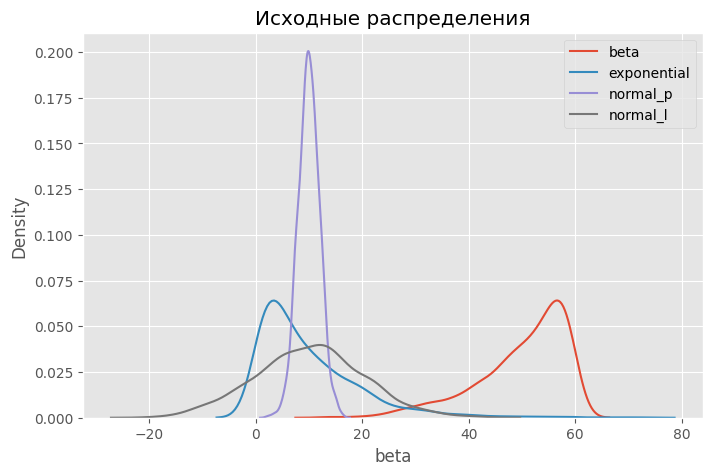

In [206]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend();

In [207]:
df_p.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.311274,10.011339,9.967555,10.210639
std,8.204283,9.779485,1.962463,9.682780
min,11.635679,0.015825,3.289944,-19.652190
25%,45.691938,3.073876,8.602310,3.522060
50%,52.237641,6.962793,9.981716,10.346419
75%,57.038491,13.215126,11.328331,16.093692
max,59.999183,59.312478,15.976393,42.685510


MINMAXSCALER

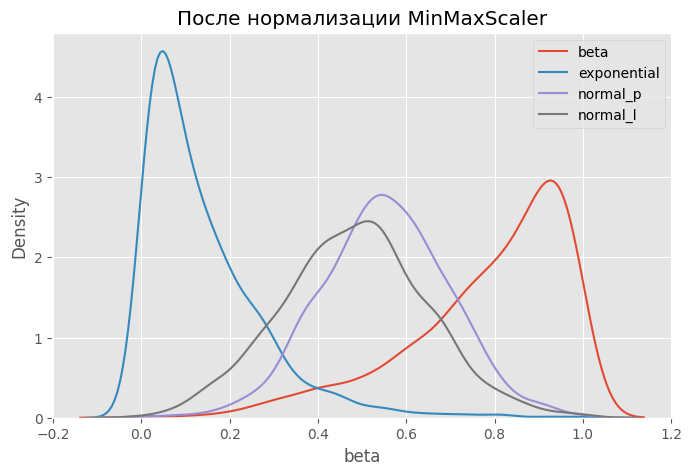

In [213]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_mm['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_mm['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_mm['normal_l'], ax=ax1, label ='normal_l')
plt.legend();

In [215]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


ROBUSTSCALER

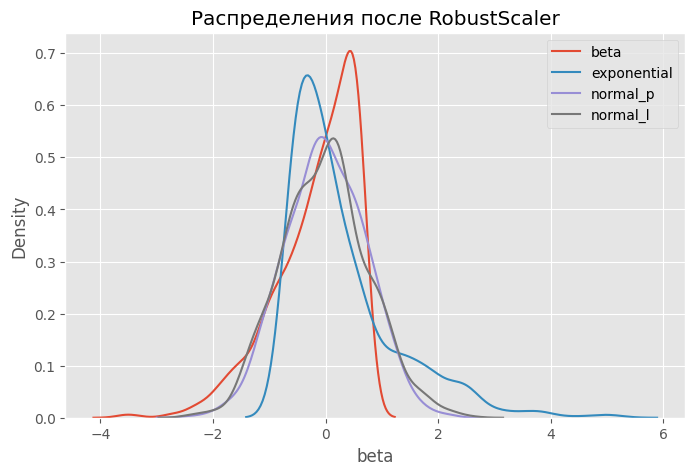

In [218]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df_p)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_r['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_r['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_r['normal_l'], ax=ax1, label ='normal_l')
plt.legend();

СТАНДАРТИЗАЦИЯ 

STANDARDSCALER

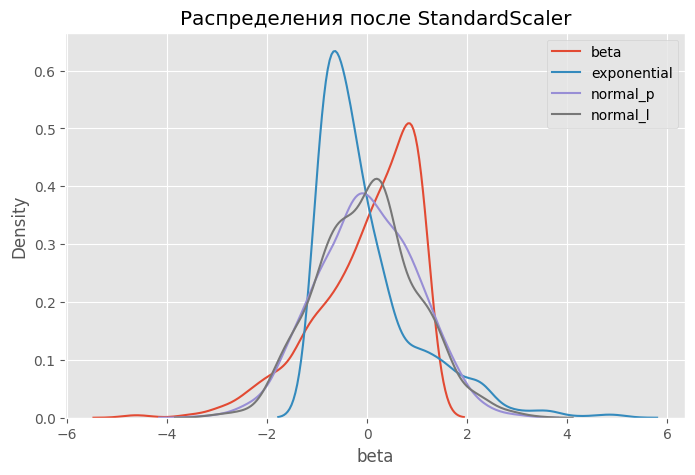

In [221]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df_p)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_s['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_s['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_s['normal_l'], ax=ax1, label ='normal_l')
plt.legend();

In [222]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-4.440892e-16,-1.669775e-16,1.062261e-15,-1.598721e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.716433e+00,-1.022601e+00,-3.404371e+00,-3.085661e+00
25%,-5.633213e-01,-7.097444e-01,-6.960273e-01,-6.911162e-01
50%,2.349176e-01,-3.118847e-01,7.219629e-03,1.402982e-02
75%,8.203743e-01,3.277667e-01,6.937491e-01,6.078829e-01
max,1.181426e+00,5.043804e+00,3.063418e+00,3.355557e+00


**Однако мы составили небольшую инструкцию по преобразованию признаков:**

+ если признак распределён нормально, то его необходимо стандартизировать;  
+ если признак распределён ненормально, его необходимо нормализовать;  
+ если разброс значений небольшой, то можно обойтись без преобразования данных.  

In [251]:
# инициализируем нормализатор RobustScaler
r_scaler_2 = preprocessing.RobustScaler()

In [261]:
x = df['price'].values

In [266]:
x = x.reshape(-1, 1)

In [268]:
# кодируем исходный датасет
df_r_2 = r_scaler_2.fit_transform(x)

In [270]:
df_r_2 

array([[ 0.33469951],
       [-0.59090909],
       [-0.63636364],
       ...,
       [ 0.09090909],
       [ 0.18181818],
       [-0.31818182]])

In [273]:
df_r_2 = pd.DataFrame(df_r_2, columns=['price_norm'])

In [284]:
round(df_r_2['price_norm'].sum())

43501

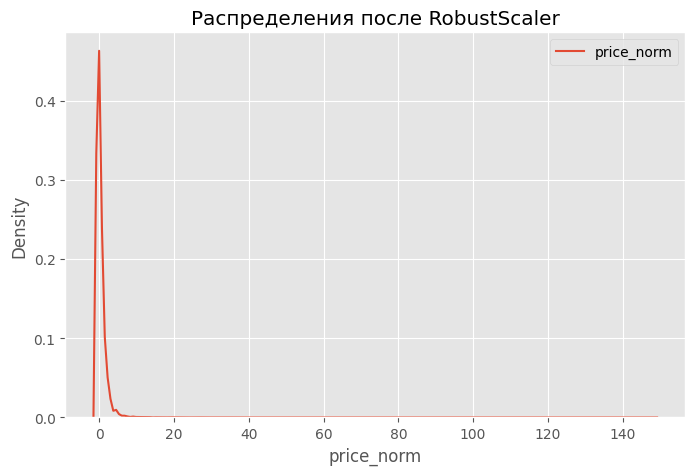

In [278]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r_2['price_norm'], ax=ax1, label ='price_norm')
plt.legend();

In [279]:
# инициализируем нормализатор MinMaxScaler
mm_scaler_2 = preprocessing.MinMaxScaler()

In [280]:
# кодируем исходный датасет
df_mm_2 = mm_scaler_2.fit_transform(x)

In [281]:
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm_2 = pd.DataFrame(df_mm_2, columns=['price_norm'])

In [285]:
round(df_mm_2['price_norm'].sum())

1237

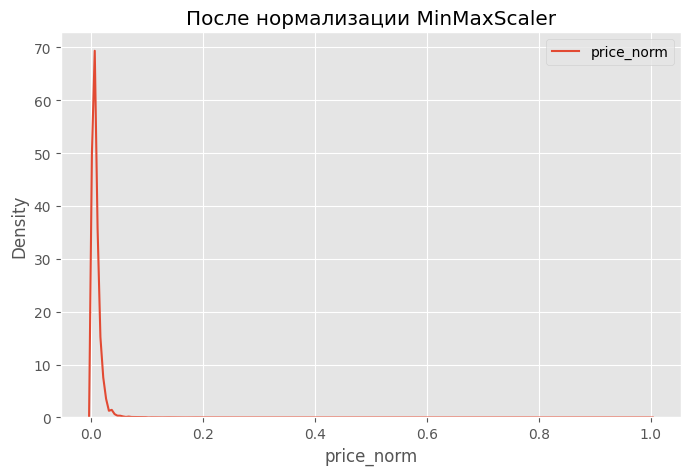

In [282]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm_2['price_norm'], ax=ax1, label ='price_norm')
plt.legend();

In [289]:
df_r_2

,price_norm
0,0.334700
1,-0.590909
2,-0.636364
3,-0.681818
4,1.681818
...,...
129967,0.000000
129968,2.136364
129969,0.090909
129970,0.181818


In [312]:
print(df.index.is_unique) 

True


In [297]:
df_1 = df.reset_index(drop=True) # сброс индексов, так как concat ругался 

In [310]:
df = pd.concat([df_1, df_r_2], axis=1)

In [313]:
# инициализируем стандартизатор StandardScaler
s_scaler_2 = preprocessing.StandardScaler()

In [321]:
# кодируем исходный датасет
df_s_2 = s_scaler_2.fit_transform(x)

In [323]:
df_s_2.shape

(129972, 1)

In [324]:
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s_2 = pd.DataFrame(df_s_2, columns=['price_stand'])

In [325]:
df_s_2

,price_stand
0,0.000003
1,-0.514525
2,-0.539793
3,-0.565060
4,0.748842
...,...
129967,-0.186050
129968,1.001515
129969,-0.135515
129970,-0.084981


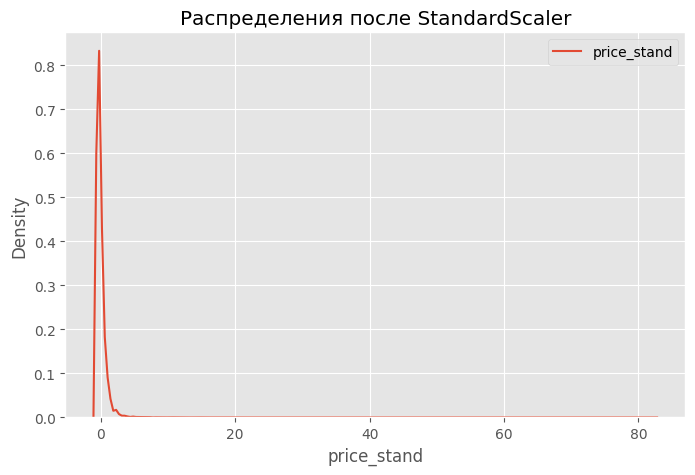

In [326]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s_2['price_stand'], ax=ax1, label ='price_stand')
plt.legend();

In [327]:
df = pd.concat([df, df_s_2], axis=1)

In [330]:
df['price_stand'][129968]

1.001514868120814

7. Отбор признаков. Мультиколлинеарность

In [332]:
iris = pd.read_csv('iris.csv')

In [333]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


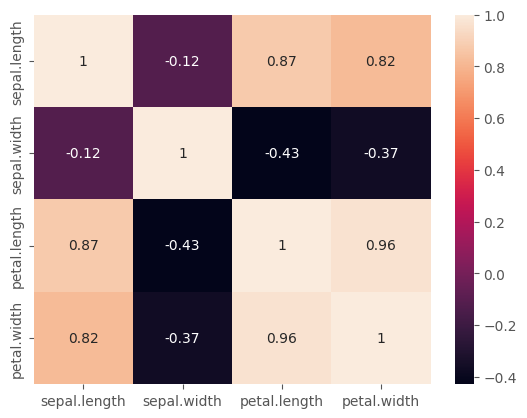

In [335]:
sns.heatmap(iris.corr(numeric_only=True), annot=True);

In [339]:
iris = iris.drop(['petal.width'], axis=1)

In [341]:
iris = iris.drop(['petal.length'], axis=1)

In [342]:
iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


In [344]:
round(df.corr(), 2)

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_2760\1156607370.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr(), 2)


,points,price,price_round,year,is_usa,is_france,is_italy,old_wine,area,price_norm,price_stand
points,1.00,0.40,0.40,0.07,0.03,0.06,0.02,-0.05,0.02,0.40,0.40
price,0.40,1.00,1.00,0.02,0.03,0.05,0.04,0.06,0.02,1.00,1.00
price_round,0.40,1.00,1.00,0.02,0.03,0.05,0.04,0.06,0.02,1.00,1.00
year,0.07,0.02,0.02,1.00,0.09,-0.09,-0.04,0.12,0.09,0.02,0.02
is_usa,0.03,0.03,0.03,0.09,1.00,-0.38,-0.36,-0.01,0.97,0.03,0.03
is_france,0.06,0.05,0.05,-0.09,-0.38,1.00,-0.19,-0.08,-0.40,0.05,0.05
is_italy,0.02,0.04,0.04,-0.04,-0.36,-0.19,1.00,0.09,-0.39,0.04,0.04
old_wine,-0.05,0.06,0.06,0.12,-0.01,-0.08,0.09,1.00,0.01,0.06,0.06
area,0.02,0.02,0.02,0.09,0.97,-0.40,-0.39,0.01,1.00,0.02,0.02
price_norm,0.40,1.00,1.00,0.02,0.03,0.05,0.04,0.06,0.02,1.00,1.00


ПРАКТИКА

In [346]:
heart = pd.read_csv('heart.csv')

In [348]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [350]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [351]:
heart['old'].sum()

79

In [357]:
def trestbps_mean(age, sex):
    if age <= 20 and sex == 1: # man
        x = 123
    elif age >= 21 and age <= 30 and sex == 1:
        x = 126
    elif age >= 31 and age <= 40 and sex == 1:
        x = 129
    elif age >= 41 and age <= 50 and sex == 1:
        x = 135
    elif age >= 51 and age <= 60 and sex == 1:
        x = 142
    elif age >= 61 and sex == 1:
        x = 142
    elif age <= 20 and sex == 0: # woman
        x = 116
    elif age >= 21 and age <= 30 and sex == 0:
        x = 120
    elif age >= 31 and age <= 40 and sex == 0:
        x = 127
    elif age >= 41 and age <= 50 and sex == 0:
        x = 137
    elif age >= 51 and age <= 60 and sex == 0:
        x = 144
    elif age >= 61 and sex == 0:
        x = 159
    return x

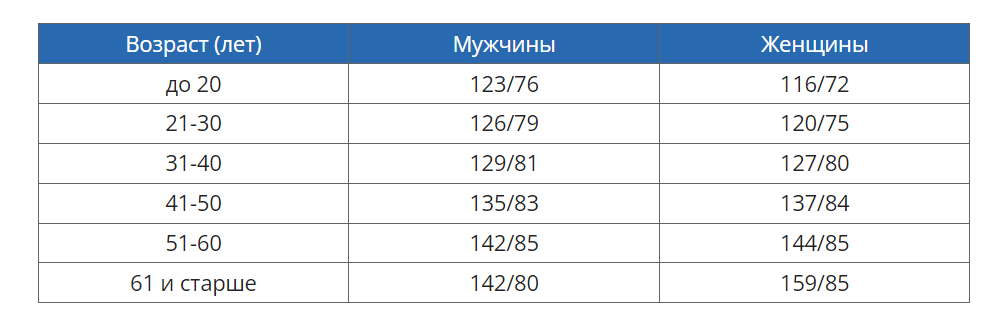

In [360]:
# Применение функции к 2 столбцам дата фрейма
heart['trestbps_mean'] = heart.apply(lambda row: trestbps_mean(row['age'], row['sex']), axis=1)

In [363]:
heart.iloc[300, :]

age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

In [365]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [367]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [368]:
encoder_2 = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])

In [369]:
encoder_2

OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])

In [370]:
heart_c = heart.copy()

In [371]:
heart_c = encoder_2.fit_transform(heart_c)

In [372]:
heart_c

,age,sex,cp_1,cp_2,cp_3,cp_4,trestbps,chol,fbs,restecg_1,...,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4,target,old,trestbps_mean
0,63,1,1,0,0,0,145,233,1,1,...,0,0,0,1,0,0,0,1,1,142
1,37,1,0,1,0,0,130,250,0,0,...,0,0,0,0,1,0,0,1,0,129
2,41,0,0,0,1,0,130,204,0,1,...,0,0,0,0,1,0,0,1,0,137
3,56,1,0,0,1,0,120,236,0,0,...,0,0,0,0,1,0,0,1,0,142
4,57,0,0,0,0,1,120,354,0,0,...,0,0,0,0,1,0,0,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,0,1,140,241,0,0,...,0,0,0,0,0,1,0,0,0,144
299,45,1,1,0,0,0,110,264,0,0,...,0,0,0,0,0,1,0,0,0,135
300,68,1,0,0,0,1,144,193,1,0,...,0,0,0,0,0,1,0,0,1,142
301,57,1,0,0,0,1,130,131,0,0,...,1,0,0,0,0,1,0,0,0,142


In [373]:
mm_scaler_2 = preprocessing.MinMaxScaler()

In [374]:
heart['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [376]:
heart_mm = mm_scaler_2.fit_transform(heart['chol'].values.reshape(-1, 1))

In [377]:
heart_mm

array([[0.24429224],
       [0.28310502],
       [0.17808219],
       [0.25114155],
       [0.52054795],
       [0.15068493],
       [0.38356164],
       [0.31278539],
       [0.16666667],
       [0.09589041],
       [0.25799087],
       [0.34018265],
       [0.3196347 ],
       [0.19406393],
       [0.35844749],
       [0.21232877],
       [0.48858447],
       [0.2283105 ],
       [0.27625571],
       [0.25799087],
       [0.24657534],
       [0.24429224],
       [0.2283105 ],
       [0.26712329],
       [0.16666667],
       [0.40182648],
       [0.19634703],
       [0.11187215],
       [0.66438356],
       [0.16210046],
       [0.16438356],
       [0.11643836],
       [0.21232877],
       [0.33561644],
       [0.19863014],
       [0.11643836],
       [0.40639269],
       [0.24200913],
       [0.32648402],
       [0.53424658],
       [0.41552511],
       [0.2716895 ],
       [0.18721461],
       [0.31506849],
       [0.44520548],
       [0.4543379 ],
       [0.24885845],
       [0.299

In [378]:
heart_mm = pd.DataFrame(heart_mm, columns=['chol_norm'])

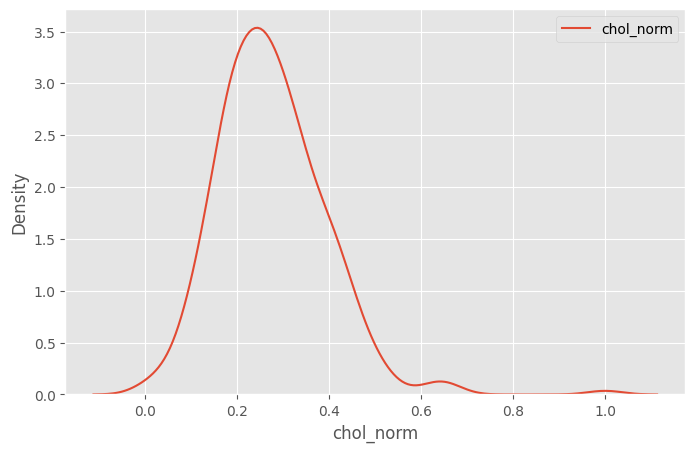

In [379]:
fig = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(heart_mm['chol_norm'], label ='chol_norm')
plt.legend();

In [380]:
heart_mm.describe()

,chol_norm
count,303.000000
mean,0.274575
std,0.118335
min,0.000000
25%,0.194064
50%,0.260274
75%,0.339041
max,1.000000


In [391]:
# инициализируем нормализатор RobustScaler
r_scaler_2 = preprocessing.RobustScaler()
col_names_2 = list(heart.columns)

In [392]:
# копируем исходный датасет
heart_r = r_scaler_2.fit_transform(heart)

In [393]:
heart_r = pd.DataFrame(heart_r, columns=col_names_2)

In [394]:
# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,0.399340,0.729373,0.313531,-0.455446,0.260726,-0.066007
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,0.616226,1.022606,0.612277,0.498835,0.439757,1.487564
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,-2.000000,-1.000000,0.000000,-3.200000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,1.000000,4.000000,1.000000,0.000000,1.000000,3.400000


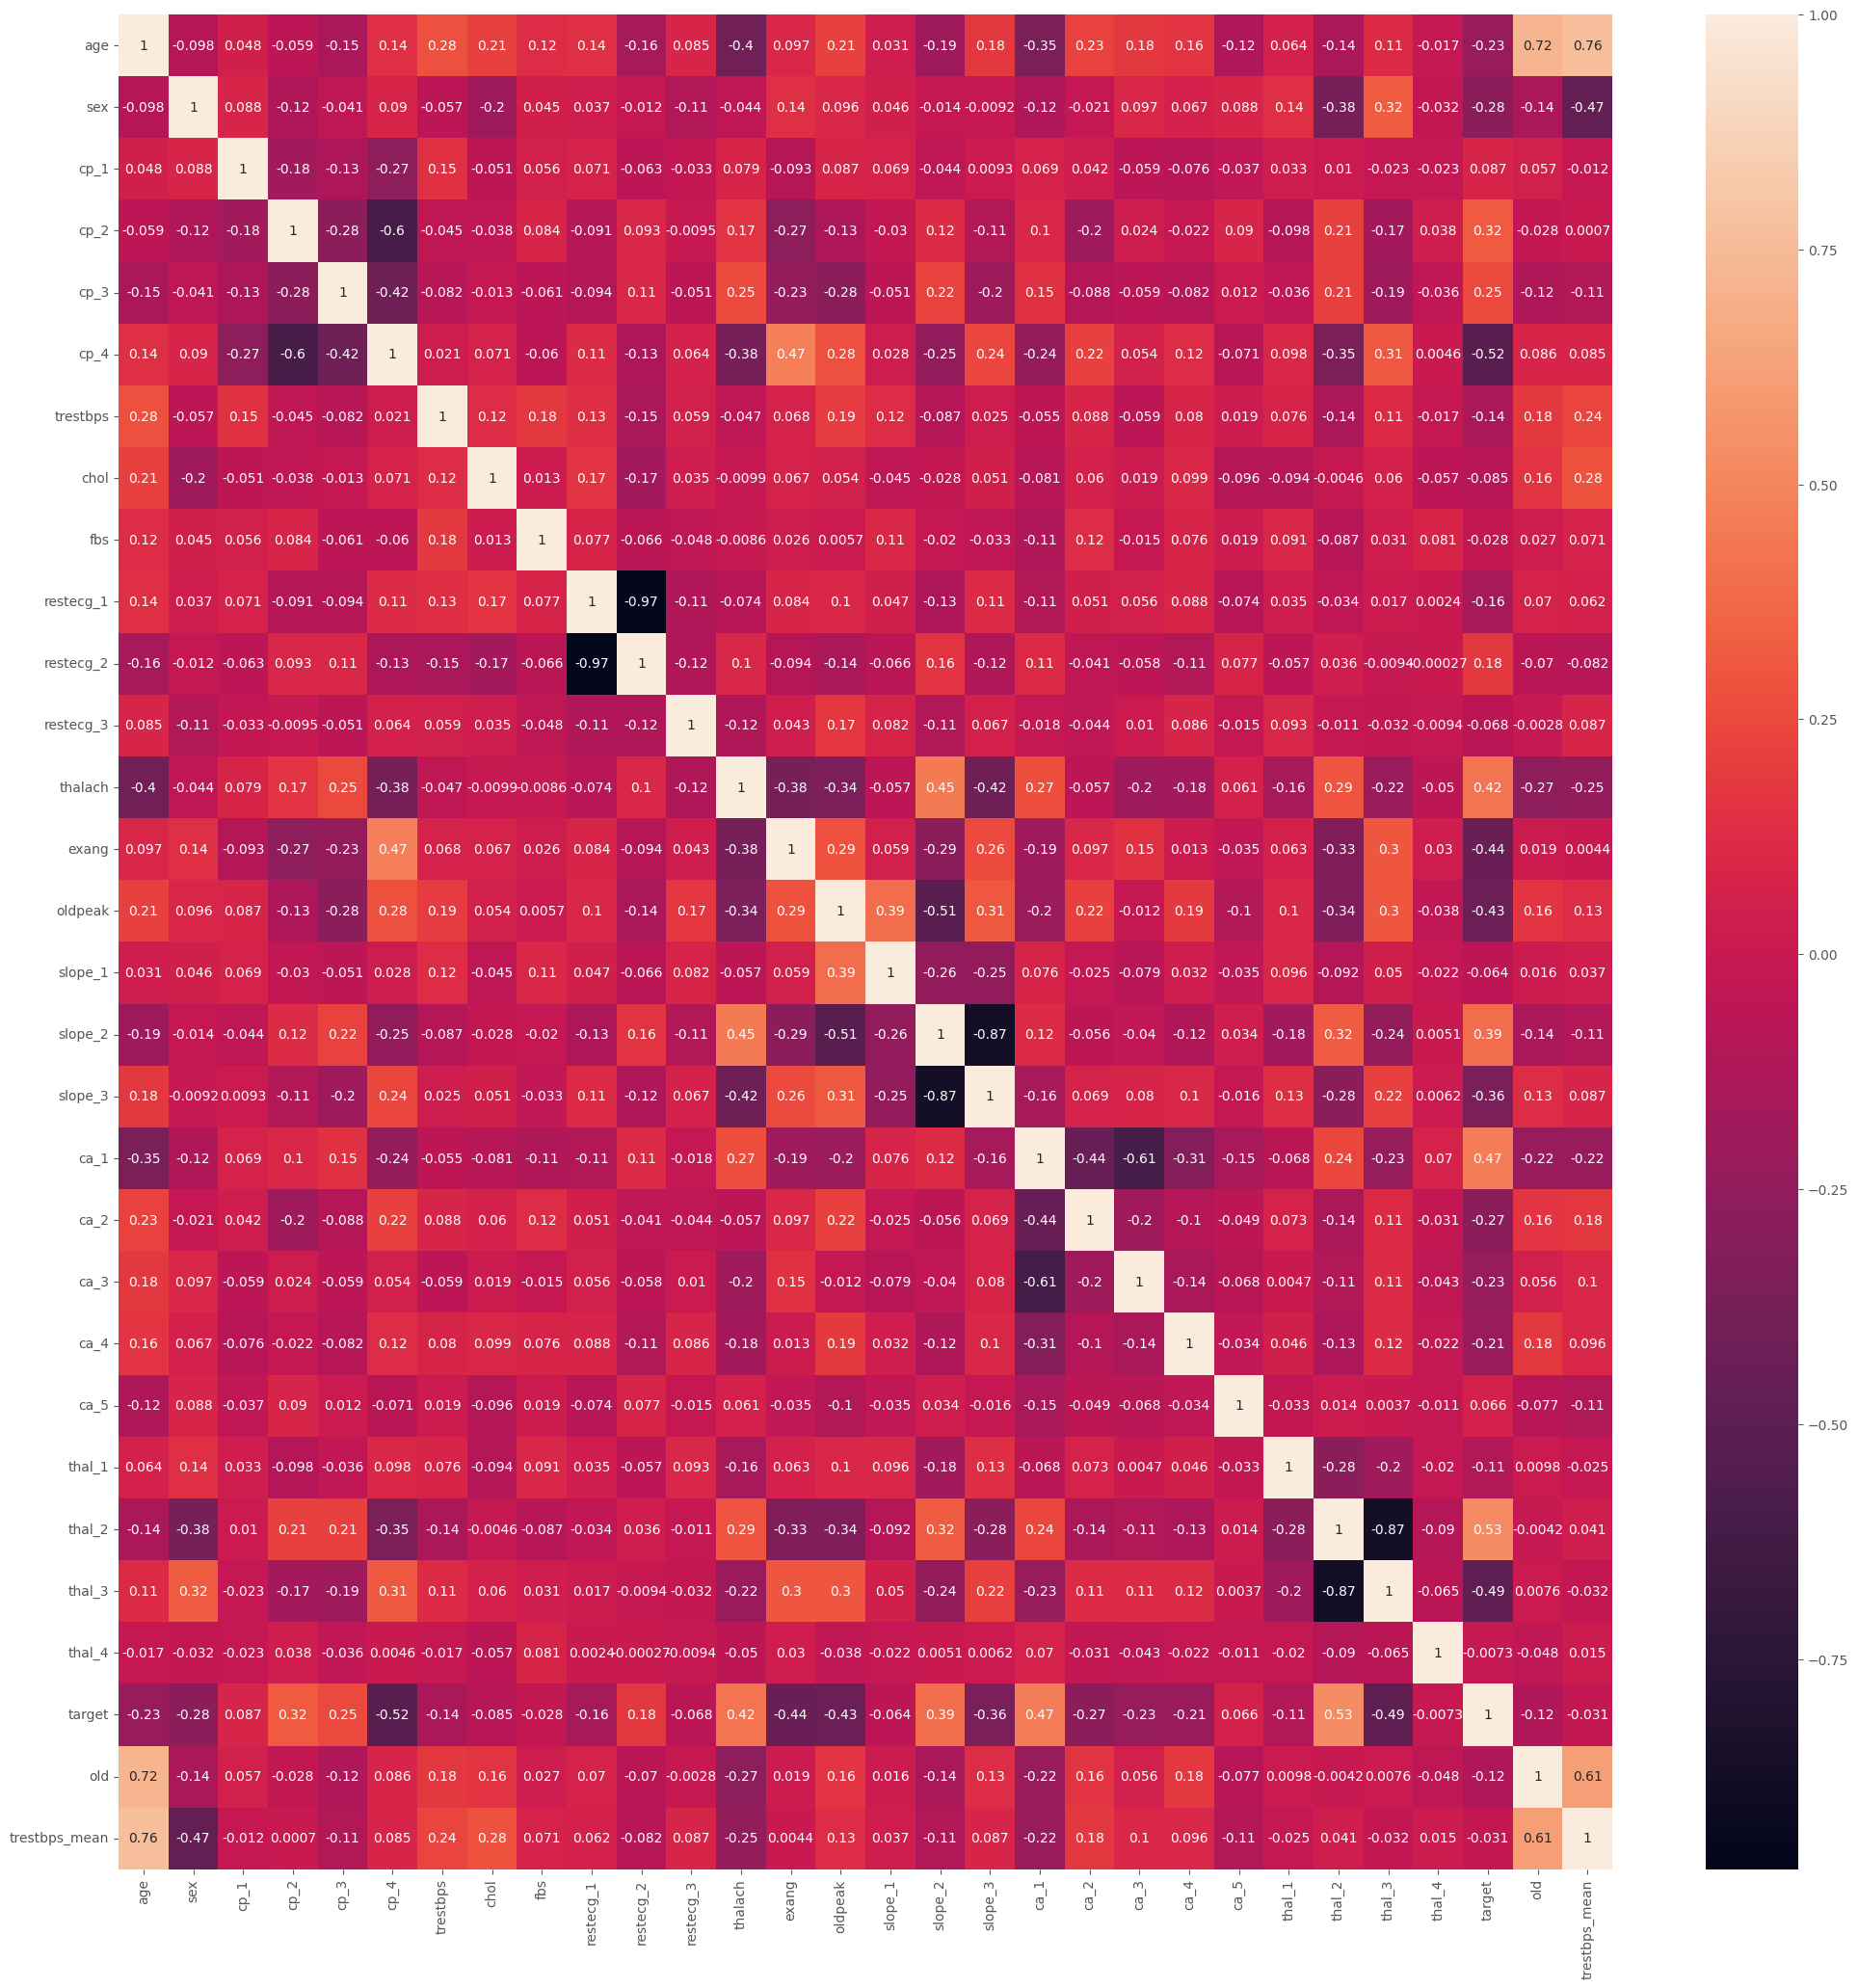

In [400]:
fig = plt.subplots(figsize=(25, 25))
sns.heatmap(heart_c.corr(), annot=True);